In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

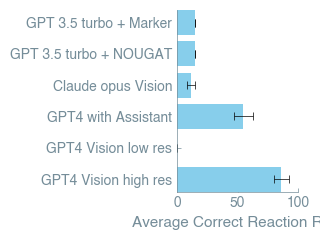

In [3]:
data = [
    ['model', 'correct reaction rate', 'standard deviation'],
    ('GPT4 Vision high res', 85.86, 6.31), 
    ('GPT4 Vision low res', 0.00, 0.00), 
    ('GPT4 with Assistant', 54.55, 8.02), 
    ('Claude opus Vision', 11.46, 3.33), 
    ('GPT 3.5 turbo + NOUGAT', 15.15, 0.00), 
    ('GPT 3.5 turbo + Marker', 15.15, 0.00)
]

models = [item[0] for item in data[1:]] 
correct_reaction_rates = [item[1] for item in data[1:]]
standard_deviations = [item[2] for item in data[1:]]


plt.style.use('lamalab.mplstyle')

fig, ax = plt.subplots()
ax.barh(y=np.arange(len(models)), width=correct_reaction_rates, xerr=standard_deviations,
        capsize=4, color='skyblue', error_kw={'elinewidth': 0.5, 'capsize': 3, 'capthick': 0.5})

plt.xlabel('Average Correct Reaction Rate') 
plt.yticks(ticks=np.arange(len(models)), labels=models)  
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_xlim(0, 100)
plt.tight_layout()
plt.show()

fig.savefig('comparison_of_standard_deviations.png',bbox_inches='tight',dpi=300)

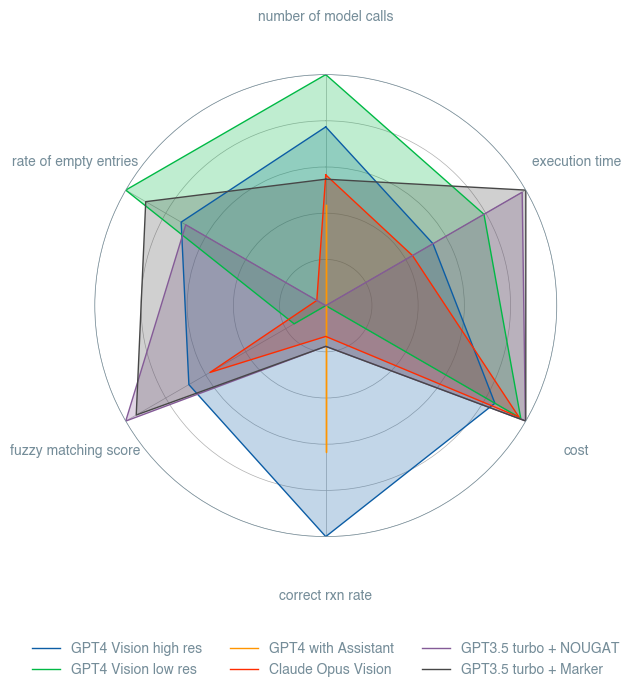

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
columns = [
    'model', 'number of model calls', 'execution time', 'cost',
    'correct rxn rate', 'fuzzy matching score', 'rate of empty entries'
]
data_list = [
    ('GPT4 Vision high res', 14.0, 537.81, 1.51, 85.86, 0.73, 13.99),
    ('GPT4 Vision low res', 10.0, 328.0, 0.29, 0.0, 0.63, 9.53),
    ('GPT4 with Assistant', 20.0, 978.97, 9.50, 54.55, 0.60, 25.62),
    ('Claude Opus Vision', 17.67, 622.13, 0.37, 11.46, 0.71, 24.90),
    ('GPT3.5 turbo + NOUGAT', 27.67, 170.67, 0.07, 15.15, 0.79, 14.36),
    ('GPT3.5 turbo + Marker', 18.0, 155.73, 0.05, 15.15, 0.78, 11.14)
]

plt.style.use('lamalab.mplstyle')

# Create a DataFrame
new_data = pd.DataFrame(data_list, columns=columns)

# Normalize the features
# Inverting 'cost', 'execution time', 'number of model calls' so that lower is better
for feature in ['cost', 'execution time', 'number of model calls', 'rate of empty entries']:
    new_data[feature] = 1 - (new_data[feature] - new_data[feature].min()) / (new_data[feature].max() - new_data[feature].min())

# Normalizing other features so that higher is better
for feature in ['correct rxn rate', 'fuzzy matching score']:
    new_data[feature] = (new_data[feature] - new_data[feature].min()) / (new_data[feature].max() - new_data[feature].min())

# Prepare to plot the radar chart with normalized data
num_vars = len(columns[1:])  # Exclude 'model' for plotting
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Split the circle into even parts
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns[1:])  # Exclude 'model' from labels
ax.tick_params(axis='x', which='major', pad=35)

# Plot each model
for i, model in enumerate(new_data['model']):
    values = new_data.iloc[i, 1:].tolist()  # Exclude 'model' for plotting
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

# Add legend and show plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.grid(True)  # Show the grid
ax.set_yticklabels([])  # Hide radial ticks

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Save the plot as a file
fig.savefig('comparison_of_models.png',bbox_inches='tight',dpi=300)
# Show the plot
plt.show()


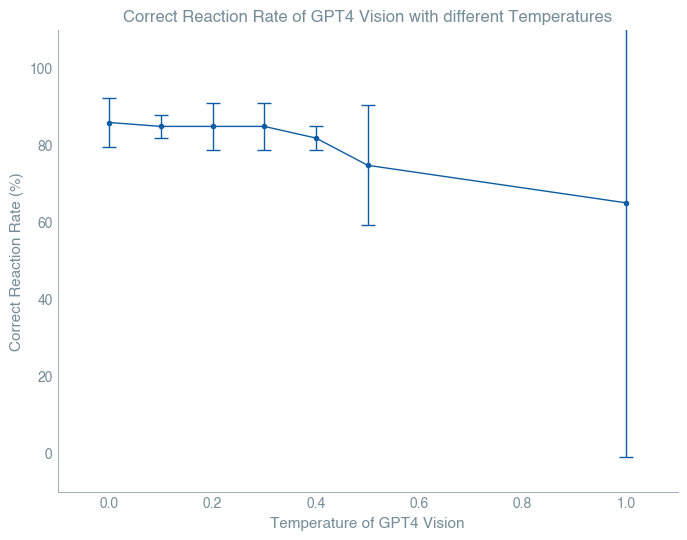

In [3]:
data = [
    ['temperature', 'correct reaction score', 'standard deviation'],
    (0.0, 85.86, 6.31),
    (0.1, 84.85, 3.03),
    (0.2, 84.85, 6.06),
    (0.3, 84.85, 6.06),
    (0.4, 81.82, 3.03),
    (0.5, 74.75, 15.55),
    (1.0, 65,66, 17.50)
]

plt.style.use('lamalab.mplstyle')

temperatures = [item[0] for item in data[1:]]
correct_reaction_scores = [item[1] for item in data[1:]] 
standard_deviations = [item[2] for item in data[1:]] 

# Plot the line chart with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(temperatures, correct_reaction_scores, yerr=standard_deviations, fmt='-o', capsize=5)

# Set the labels and title
plt.xlabel('Temperature of GPT4 Vision')
plt.ylabel('Correct Reaction Rate (%)')
plt.title('Correct Reaction Rate of GPT4 Vision with different Temperatures')

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.xlim(-0.1, 1.1)
plt.ylim(-10, 110)

output_file_path = 'comparison_of_temperatures.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)
plt.show()

/var/folders/tv/b0y73fwd4zn44s4jmxl5169w0000gn/T/ipykernel_74915/764500627.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years, ax=ax, kde_kws={'cut': 0})


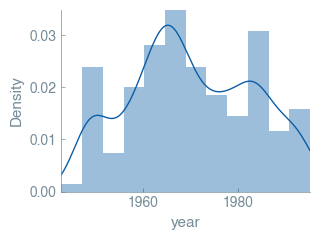

In [27]:
import matplotlib.pyplot as plt
from crossref.restful import Works
import seaborn as sns
import json
import matplotlib as mpl


def load_json(file_path):
    with open(file_path, 'r') as handle:
        return json.load(handle)

mpl.style.use('lamalab.mplstyle')

data = load_json('../../doi_extraction/doi_output.json')
doi_list = data['doi_list']

works = Works()
years = []

for doi in doi_list:
    try:
        meta = works.doi(doi)
        years.append(meta['published']['date-parts'][0][0])
    except Exception:
        pass

/var/folders/tv/b0y73fwd4zn44s4jmxl5169w0000gn/T/ipykernel_74915/327058827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(years, ax=ax, kde_kws={'cut': 0})


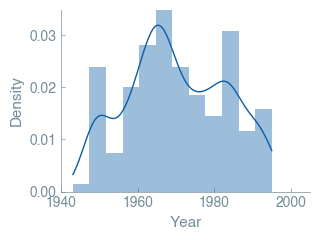

In [33]:
fig, ax = plt.subplots()

sns.distplot(years, ax=ax, kde_kws={'cut': 0})
ax.set_xlabel('Year')
plt.xlim(1940,2005)
fig.tight_layout()

fig.savefig('paper_year_dist.png', bbox_inches='tight', dpi=300)
plt.show()

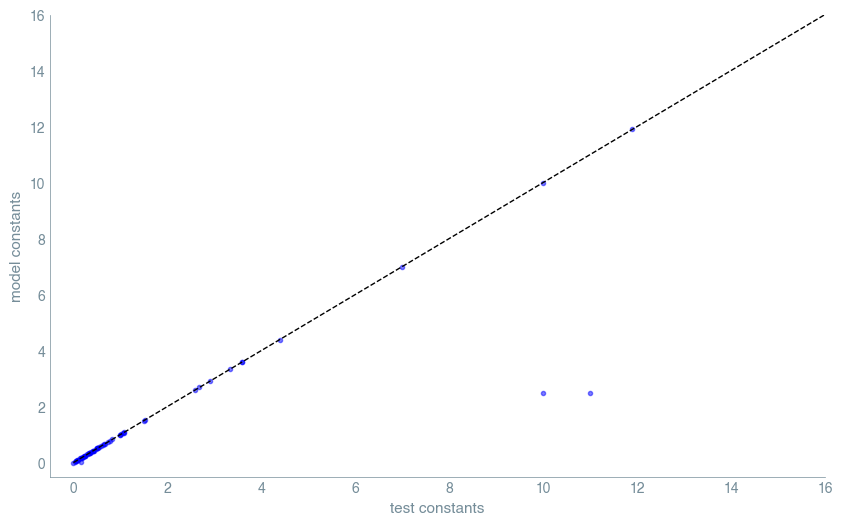

In [6]:
import json
import matplotlib.pyplot as plt

json_file_path = '../rxn_const.json'
with open(json_file_path, 'r') as file:
        data = json.load(file)

mpl.style.use('lamalab.mplstyle')

test_constants = [item['constants'] for item in data['test_data'] if 'constants' in item]
model_constants = [item['constants'] for item in data['model_data'] if 'constants' in item]

        
flat_test_constants = [constant for sublist in test_constants for constant in sublist]
flat_model_constants = [constant for sublist in model_constants for constant in sublist]

       
plt.figure(figsize=(10, 6))
plt.scatter(flat_test_constants, flat_model_constants, color='blue', alpha=0.5)
plt.xlabel('test constants')
plt.ylabel('model constants')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.xlim(-0.5, 16)
plt.ylim(-0.5, 16)

valid_test_constants = [value for value in flat_test_constants if value is not None]
valid_model_constants = [value for value in flat_model_constants if value is not None]

max_value = max(max(valid_test_constants), max(valid_model_constants))
plt.plot([0, max_value], [0, max_value], 'k--', label='Diagonal line')

output_file_path = 'comparison_of_model_and_test_constants.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)

plt.show()
        

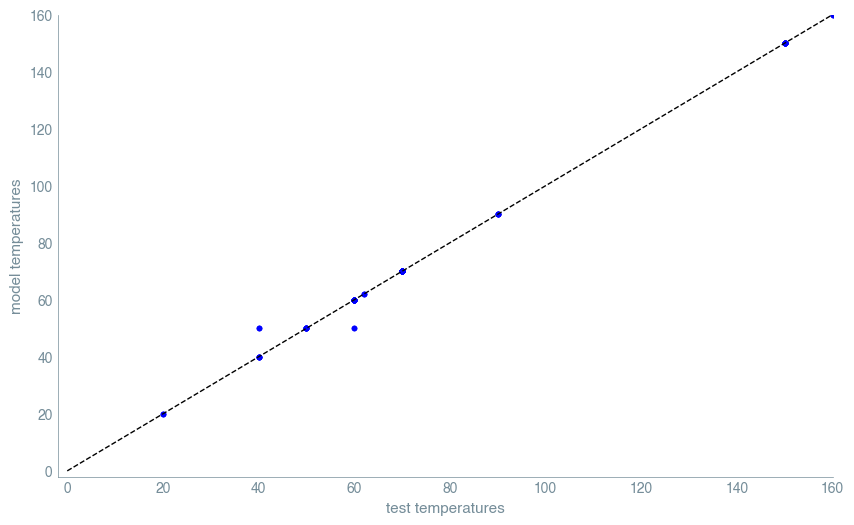

In [5]:
json_file_path = '../temp.json'
with open(json_file_path, 'r') as file:
        data = json.load(file)

mpl.style.use('lamalab.mplstyle')

test_temperatures = [temp['temperature'] for sublist in data['test_data'] for temp in sublist if 'temperature' in temp]
model_temperatures = [temp['temperature'] for sublist in data['model_data'] for temp in sublist if 'temperature' in temp]

plt.figure(figsize=(10, 6))
plt.scatter(test_temperatures, model_temperatures, color='blue', alpha=0.5)
plt.xlabel('test temperatures')
plt.ylabel('model temperatures')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

valid_test_temp = [value for value in test_temperatures if value is not None]
valid_model_temp = [value for value in model_temperatures if value is not None]

max_value = max(max(valid_test_temp), max(valid_model_temp))
plt.plot([0, max_value], [0, max_value], 'k--') 

plt.xlim(-2, 160)
plt.ylim(-2, 160)

output_file_path = 'comparison_of_model_and_test_temperatures.png' 
plt.savefig(output_file_path, bbox_inches='tight', dpi=300)

plt.show()

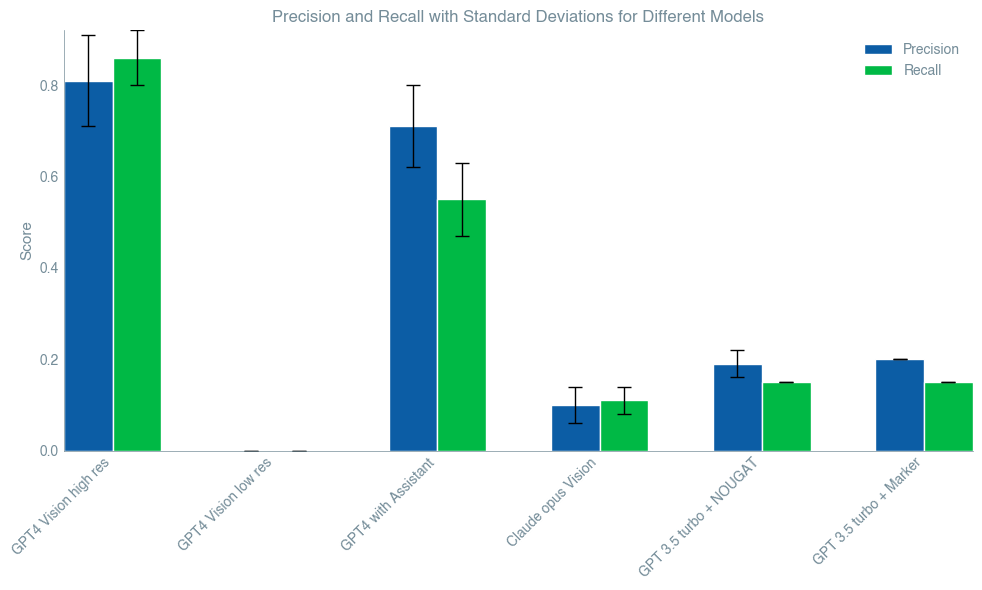

In [5]:
data = [
    ['model', 'precision','precision stand. dev.', 'recall', 'recall stand. dev.'],
    ('GPT4 Vision high res', 0.81, 0.10, 0.86, 0.06), 
    ('GPT4 Vision low res', 0.00, 0.00, 0.0, 0.0), 
    ('GPT4 with Assistant', 0.71, 0.09, 0.55, 0.08), 
    ('Claude opus Vision', 0.1, 0.04, 0.11, 0.03), 
    ('GPT 3.5 turbo + NOUGAT', 0.19, 0.03, 0.15, 0.0), 
    ('GPT 3.5 turbo + Marker', 0.2, 0.0, 0.15, 0.0)
]

plt.style.use('lamalab.mplstyle')

models = [item[0] for item in data[1:]]
precisions = [item[1] for item in data[1:]]
precision_stds = [item[2] for item in data[1:]]
recalls = [item[3] for item in data[1:]]
recall_stds = [item[4] for item in data[1:]]

# Number of models
n_models = len(models)

# Creating bar positions
x = range(n_models)
x_precision = [xi - 0.15 for xi in x]
x_recall = [xi + 0.15 for xi in x]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_precision, precisions, yerr=precision_stds, width=0.3, label='Precision', capsize=5)
ax.bar(x_recall, recalls, yerr=recall_stds, width=0.3, label='Recall', capsize=5)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.legend()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

plt.tight_layout()

fig.savefig('comparison_of_precision_&_recall.png',bbox_inches='tight',dpi=300)

plt.show()

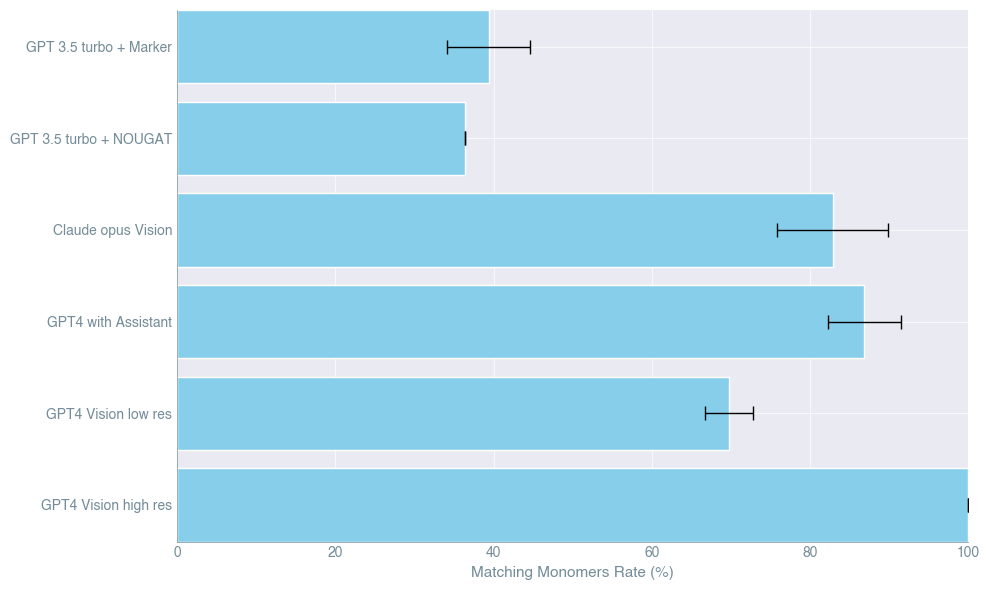

In [8]:
data = [
    ['model', 'matching monomers rate','standard dev.'],
    ('GPT4 Vision high res', 0.0, 0.0), 
    ('GPT4 Vision low res', 30.30, 3.03), 
    ('GPT4 with Assistant', 13.13, 4.63), 
    ('Claude opus Vision', 17.17, 7.0), 
    ('GPT 3.5 turbo + NOUGAT', 63.64, 0.0), 
    ('GPT 3.5 turbo + Marker', 60.61, 5.25)
]

models = [item[0] for item in data[1:]]
matching_rates = [item[1] for item in data[1:]]
standard_devs = [item[2] for item in data[1:]]

inverted_matching_rates = [100 - rate for rate in matching_rates]

# Creating the bar chart with horizontal orientation for inverted rates
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = range(len(models))

ax.barh(y_positions, inverted_matching_rates, xerr=standard_devs, color='skyblue', capsize=5)
ax.set_yticks(y_positions)
ax.set_yticklabels(models)
ax.set_xlabel('Matching Monomers Rate (%)')

# Display the plot
plt.tight_layout()
fig.savefig('comparison_of_monomer_matching_rate.png',bbox_inches='tight',dpi=300)
plt.show()
